# Matplotlib and Pandas (Part 1)

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

## Plot DataFrame with mathplotlib - overview

One of the most common ways to plot data from a DataFrame is using the `plot` method. This method provides a convenient interface for quickly creating common plots of your DataFrame's data.

Here's an example of how to use the plot method to create a line plot of a DataFrame:

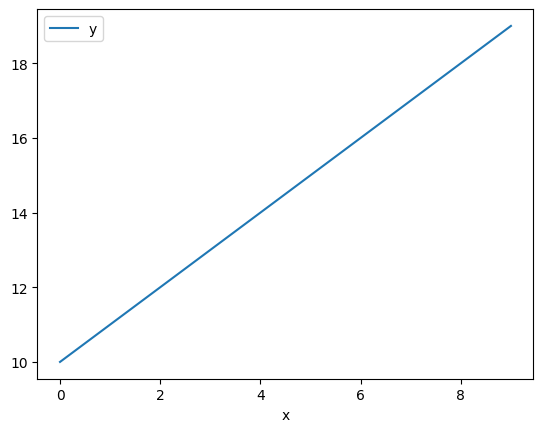

In [2]:
# create a simple DataFrame
df = pd.DataFrame({'x': range(10), 'y': range(10, 20)})

# plot the data using the 'x' and 'y' columns
df.plot(x='x', y='y')

# show the plot
plt.show()

You can also use the plot method to create other types of plots, such as bar plots, scatter plots, and histograms. For example, here's how you would create a bar plot:

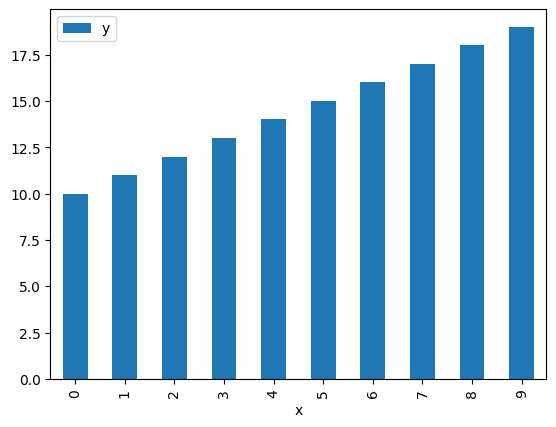

In [3]:
df.plot(kind='bar', x='x', y='y')
plt.show()

### plot multiple columns of a DataFrame

By default, df.plot() will plot all columns in a single axes, if we do not specify the y parameter.
If we pass to the y parameter a list of column names, it will plot only those columns.

<Axes: xlabel='x'>

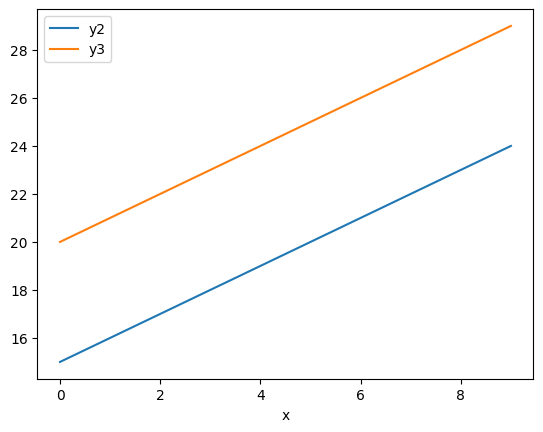

In [4]:
# create a simple DataFrame
df = pd.DataFrame({'x': range(10), 'y1': range(10, 20), 'y2': range(15, 25), 'y3': range(20, 30)})

## plot all columns
# df.plot(x='x')

## plot only 'y2' and 'y3' columns:
df.plot(x='x',y=['y2', 'y3'])

#### Make separate subplots for each column.

Setting parameter 'subplots=True' matplotlib will make separate subplots for each column.

We can specify which axes the sublots to share, by setting 'sharex' or 'sharey' parameter to True. 

With 'layout=(rows, columns)' we can set the layout of subplots

array([[<Axes: xlabel='x'>, <Axes: xlabel='x'>, <Axes: xlabel='x'>]],
      dtype=object)

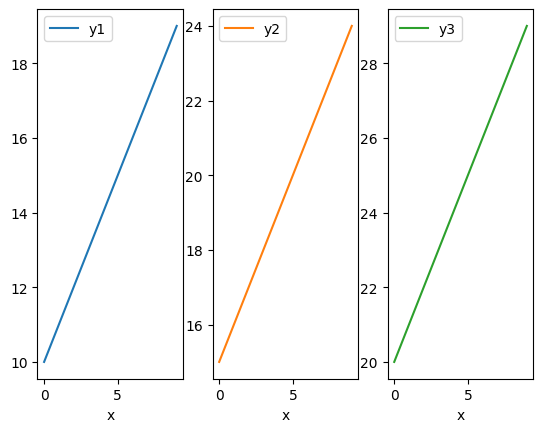

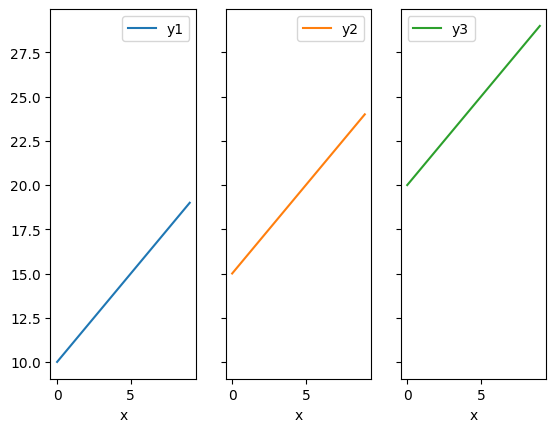

In [5]:
# create a simple DataFrame
df = pd.DataFrame({'x': range(10), 'y1': range(10, 20), 'y2': range(15, 25), 'y3': range(20, 30)})

## plot all columns, share X is by default
df.plot(x='x',subplots=True, layout=(1,3))

## plot all columns, share Y
df.plot(x='x',subplots=True, sharey=True, layout=(1,3))

#### plot each column in separate figure

If you want to plot multiple columns of your DataFrame, you'll need to loop through the columns and create a separate plot for each one.

Next code will create 3 different plots of scatter plot, one for each column 'y1', 'y2' and 'y3'.

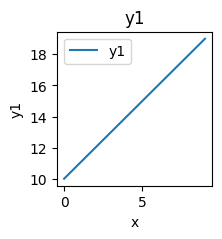

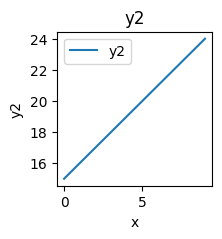

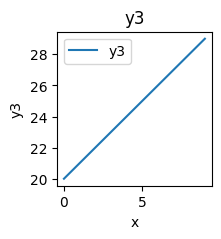

In [6]:
# create a simple DataFrame
df = pd.DataFrame({'x': range(10), 'y1': range(10, 20), 'y2': range(15, 25), 'y3': range(20, 30)})

# loop through the columns of the DataFrame
for column in df.columns[1:]:
    # create a line plot for each column
    df.plot(x='x', y=column, figsize=(2,2))
    # add a title and label the axes
    plt.title(column)
    plt.xlabel('x')
    plt.ylabel(column)

# show the plot
plt.show()

# Hands on real data

In [7]:
df = pd.read_csv("../../datasets/various/drinks.csv")

## Get some insight from the data

In [8]:
df.head(3)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF


In [9]:
### check for NaN values
df.isnull().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

We have NaN values only in the string fields, which will  not be a problem for now. But lets see which contries does not have a continent assigned:

In [10]:
df.loc[df['continent'].isnull(), ['continent','country']].head(3)
# remove head(3) to see all

,continent,country
5,NaN,Antigua & Barbuda
11,NaN,Bahamas
14,NaN,Barbados


In [11]:
# number of countries per continent:
df.continent.value_counts()

continent
AF    53
EU    45
AS    44
OC    16
SA    12
Name: count, dtype: int64

In [12]:
# average number of wine servings per continent
df.groupby('continent').wine_servings.mean().round(2).sort_values(ascending=False)

continent
EU    142.22
SA     62.42
OC     35.62
AF     16.26
AS      9.07
Name: wine_servings, dtype: float64

## Let's start ploting

**Note:** in next examples we will use the [pandas.DataFrame.plot](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html) method which is a wrapper of  [matplotlib.pyplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html). And for each plot we will use the corresponding method on the DataFrame.plot accessor. I.e. instead of df.plot(kind='bar') we will use df.plot.bar(), which are equivalent.



### Bar plots
[DataFrame.plot.bar](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.bar.html)


#### number of countries in each continent

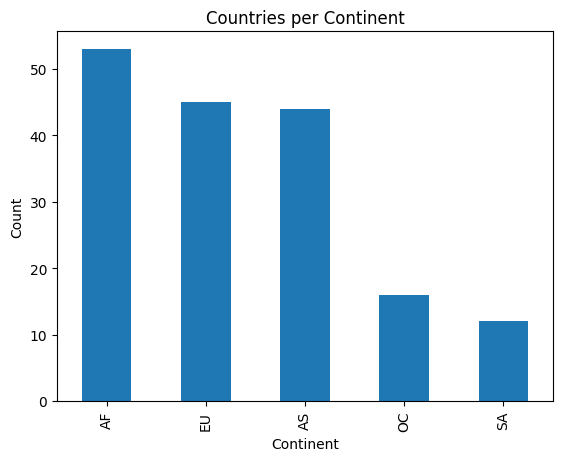

In [13]:
df.continent.value_counts().plot.bar(title='Countries per Continent')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.show()

#### average number of wine servings per continent

In [14]:
wine_servings_by_continent = df.groupby('continent').wine_servings.mean().round(2).sort_values(ascending=False)

wine_servings_by_continent

continent
EU    142.22
SA     62.42
OC     35.62
AF     16.26
AS      9.07
Name: wine_servings, dtype: float64

<Axes: title={'center': 'average number of wine servings per continent'}, xlabel='continent'>

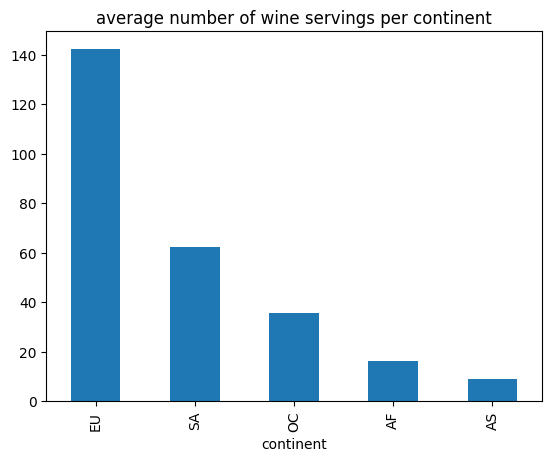

In [15]:
wine_servings_by_continent.plot(kind='bar', title='average number of wine servings per continent')

### Histogram

[DataFrame.plot.hist](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.hist.html)

Example: Plot histogram of wine_servings and beer_servings

In [16]:
wine_and_beer = df.loc[:,['wine_servings','beer_servings']]
wine_and_beer.head(3)

,wine_servings,beer_servings
0,0,0
1,54,89
2,14,25


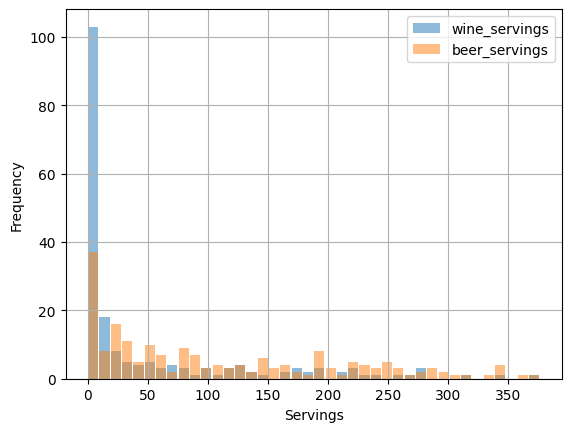

In [17]:
# histogram of wine servings
wine_and_beer.plot.hist(bins=40,rwidth=0.9,alpha = 0.5)
plt.xlabel('Servings')
plt.grid()

### Box Plot

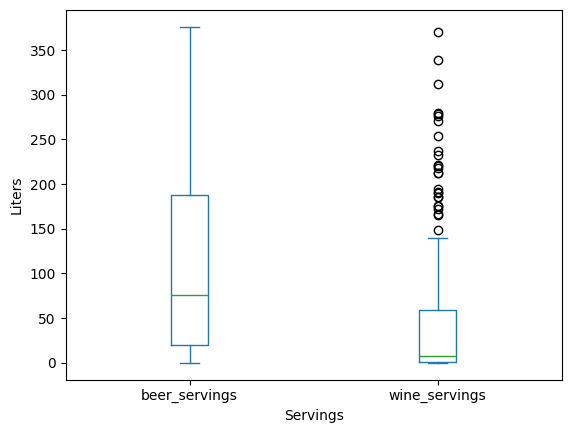

In [18]:
df.plot.box(column= ['beer_servings','wine_servings'])
plt.xlabel('Servings')
plt.ylabel('Liters')
plt.show()

### Scatter plot

[DataFrame.plot.scatter](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.scatter.html)

<AxesSubplot: xlabel='beer_servings', ylabel='wine_servings'>

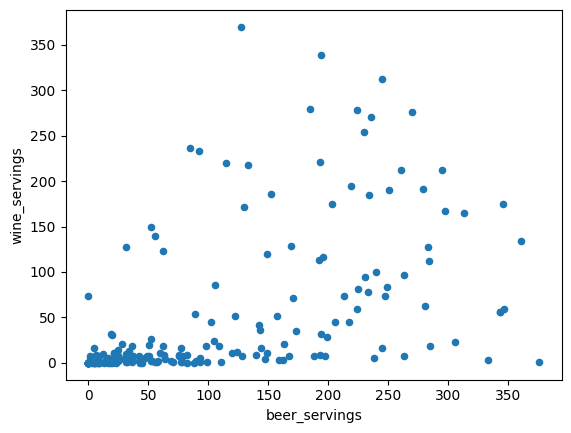

In [ ]:
# scatterplot of beer servings versus wine servings
df.plot.scatter(x='beer_servings', y='wine_servings')

<AxesSubplot: xlabel='beer_servings', ylabel='wine_servings'>

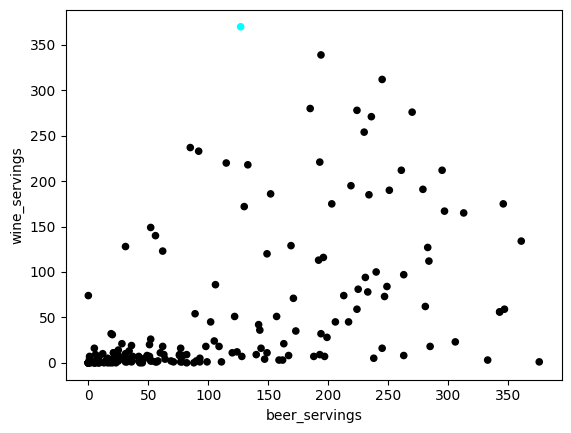

In [ ]:
# scatterplot of beer servings versus wine servings (colors by 1 condition)
# np.where(cond, A, B) works like: if(cond)? then A : else B, but on each element of the np.array

# assign a cyan color for France, black - for the rest:
color_france = np.where(df.country=='France', 'cyan', 'black')
df.plot.scatter(x='beer_servings', y='wine_servings',color=color_france)

<AxesSubplot: xlabel='beer_servings', ylabel='wine_servings'>

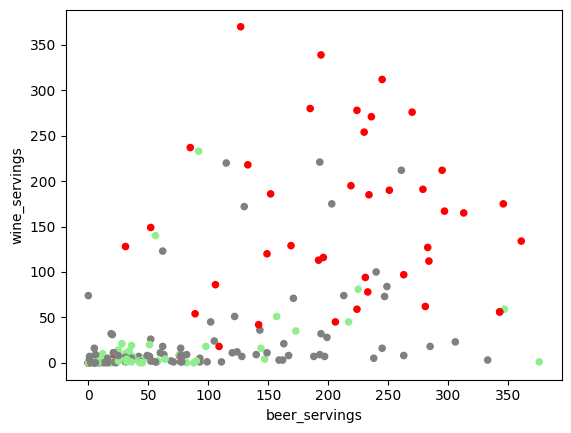

In [ ]:
# scatterplot of beer servings versus wine servings (colors more of 1 condition)

# lets make a colors array, which will hold different color values for countries we are interested.
# for the rest - the default color will be 'gray'
colors = np.full_like(df.country, 'gray')

# assign red color for the EU countries:
colors[df.continent=="EU"] = "red"

# assign lightgreen color for the AF countries:
colors[df.continent=="AF"] = "lightgreen"

df.plot.scatter(x='beer_servings', y='wine_servings',color=colors)

### BoxPlot

Reference: [boxplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html)

### Pie Chart

Reference: [pie](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html)

Let's create a pie chart of the beer_servings column, with each slice of the pie representing a different country. Note that the legend=False argument is used to remove the legend which would be the country names:

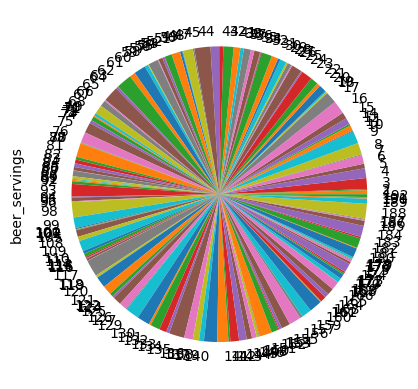

In [ ]:
df.plot(kind='pie', y='beer_servings', legend=False)
plt.show()

Definetly, we do not want to PieChart so many different values. 

Let's group the data by continent and show the beer servings consumption of each continent:

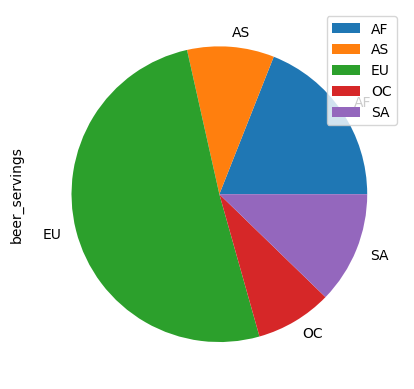

In [ ]:
df_grouped = df.groupby('continent').sum(numeric_only=True)
df_grouped.plot(kind='pie', y='beer_servings', legend=True)
plt.show()

Let's show the percentage of consumption for each continent on the chart:

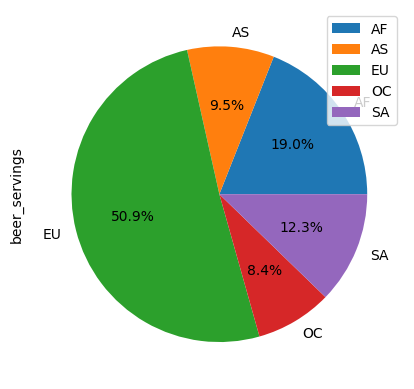

In [ ]:
df_grouped = df.groupby('continent').sum(numeric_only=True)
df_grouped.plot(kind='pie',y='beer_servings', autopct='%1.1f%%')
plt.show()
